<a href="https://colab.research.google.com/github/Sahaj001/Sahaj001/blob/master/SNA_lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color = orange size = 7>Install Ndlib

In [ ]:
!pip install ndlib

<font color = lightblue size = 6> Importing required dependencies 

In [ ]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.MultiPlot import MultiPlot
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.models.CompositeModel import CompositeModel
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison
from ndlib.viz.mpl.PrevalenceComparison import DiffusionPrevalenceComparison
%matplotlib inline
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
from ndlib.models.compartments.NodeStochastic import NodeStochastic
import bokeh
from bokeh.plotting import output_notebook

In [ ]:
import zipfile

In [ ]:
!unzip /content/drive/MyDrive/datasets/dolphins.zip

In [ ]:
!unzip /content/drive/MyDrive/datasets/karate.zip

In [ ]:
!unzip /content/drive/MyDrive/datasets/football.zip

<font size = 6 color = green> Creating required graphs

In [ ]:
import networkx as nx

g = nx.erdos_renyi_graph(1000, 0.1)

In [ ]:
g1 = nx.read_gml('/content/dolphins.gml')
g2 = nx.read_gml('/content/karate.gml',label ='id')
g3 = nx.read_gml('/content/football.gml')
g4 = nx.barabasi_albert_graph(n = 1000, m = 200 , seed = 42)

#<font color = yellow>SI Model


In [ ]:
def SIplot(graph):
  model = ep.SIModel(graph)

  cfg = mc.Configuration()
  cfg.add_model_parameter('beta', 0.005) # infection rate
  cfg.add_model_parameter("percentage_infected", 0.05)
  model.set_initial_status(cfg)
  iterations = model.iteration_bunch(200, node_status=True)
  trends = model.build_trends(iterations)
  
  from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
  viz = DiffusionTrend(model, trends)
  viz.plot()
  return

100%|██████████| 200/200 [00:01<00:00, 161.97it/s]


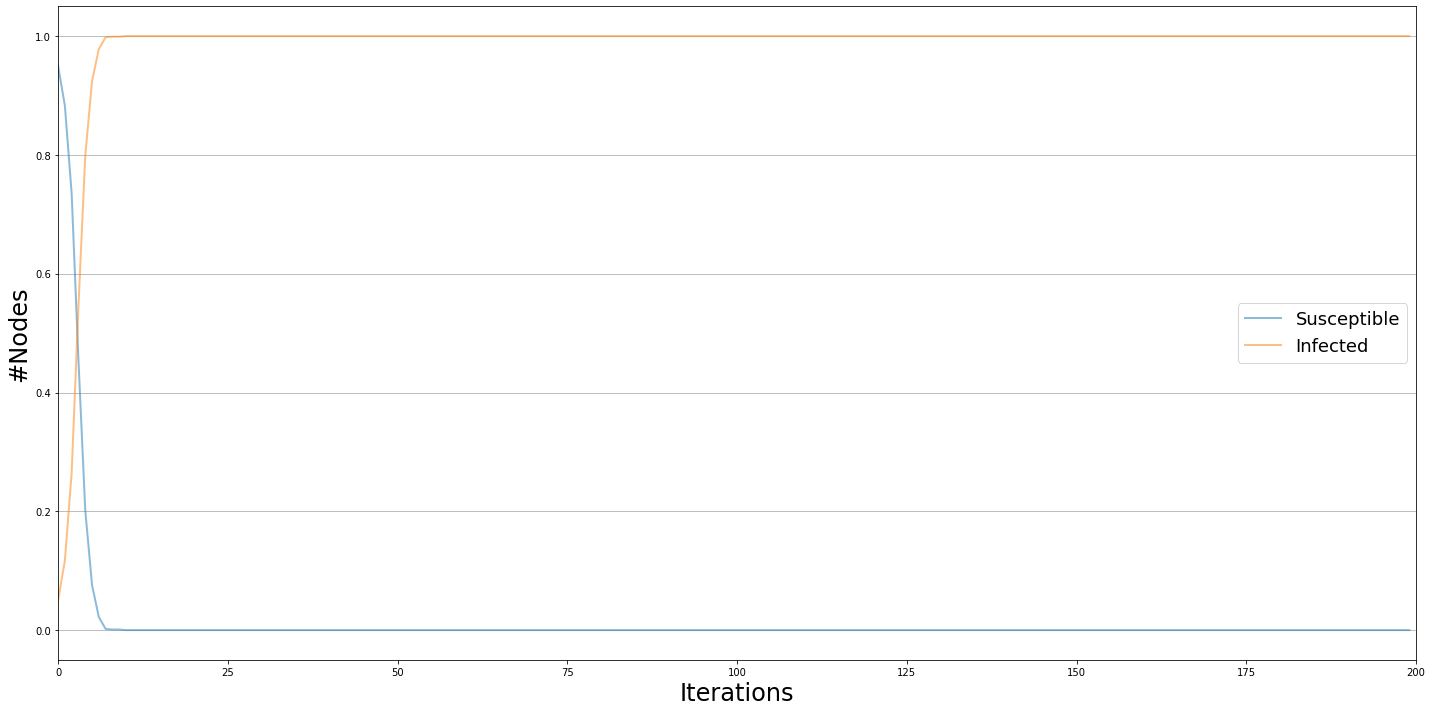

In [ ]:
SIplot(g4)

#<font color = yellow>SIR Model

In [ ]:
def SIRplot(graph,beta=0.005,gamma = 0.05,pinfect = 0.05):
  model = ep.SIRModel(graph)

  cfg = mc.Configuration()
  cfg.add_model_parameter('beta', beta) # infection rate
  cfg.add_model_parameter('gamma', gamma) # recovery rate
  cfg.add_model_parameter("percentage_infected", pinfect)

  model.set_initial_status(cfg)
  iterations = model.iteration_bunch(200, node_status=True)
  trends = model.build_trends(iterations)
  
  from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
  viz = DiffusionTrend(model, trends)
  viz.plot()
  return

100%|██████████| 200/200 [00:01<00:00, 157.84it/s]


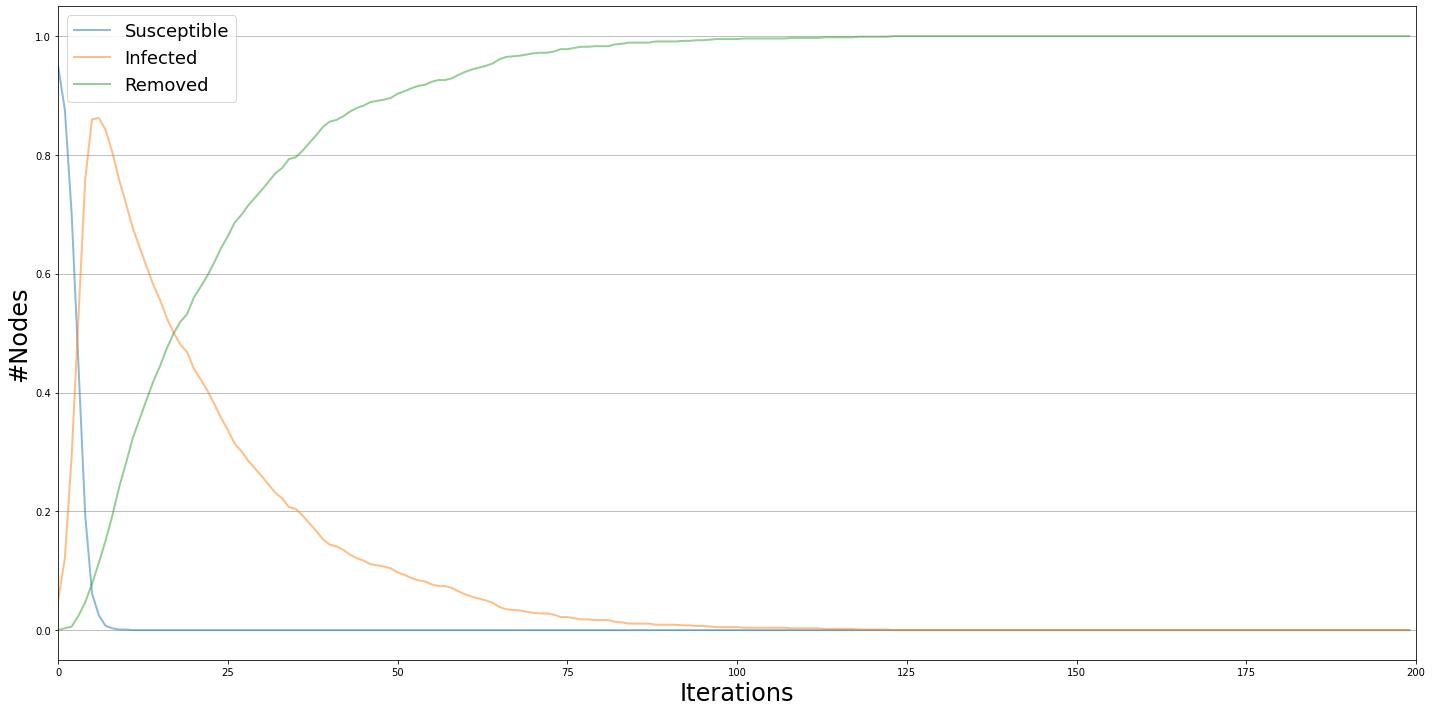

In [ ]:
SIRplot(g4)

#<font color = yellow>SIS Model

In [ ]:
def SISplot(graph):
  model = ep.SISModel(graph)

  cfg = mc.Configuration()
  cfg.add_model_parameter('beta', 0.01)
  cfg.add_model_parameter('lambda', 0.005)
  cfg.add_model_parameter("fraction_infected", 0.05)

  model.set_initial_status(cfg)
  iterations = model.iteration_bunch(200, node_status=True)
  trends = model.build_trends(iterations)
  
  from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
  viz = DiffusionTrend(model, trends)
  viz.plot()
  return

100%|██████████| 200/200 [00:00<00:00, 2392.37it/s]


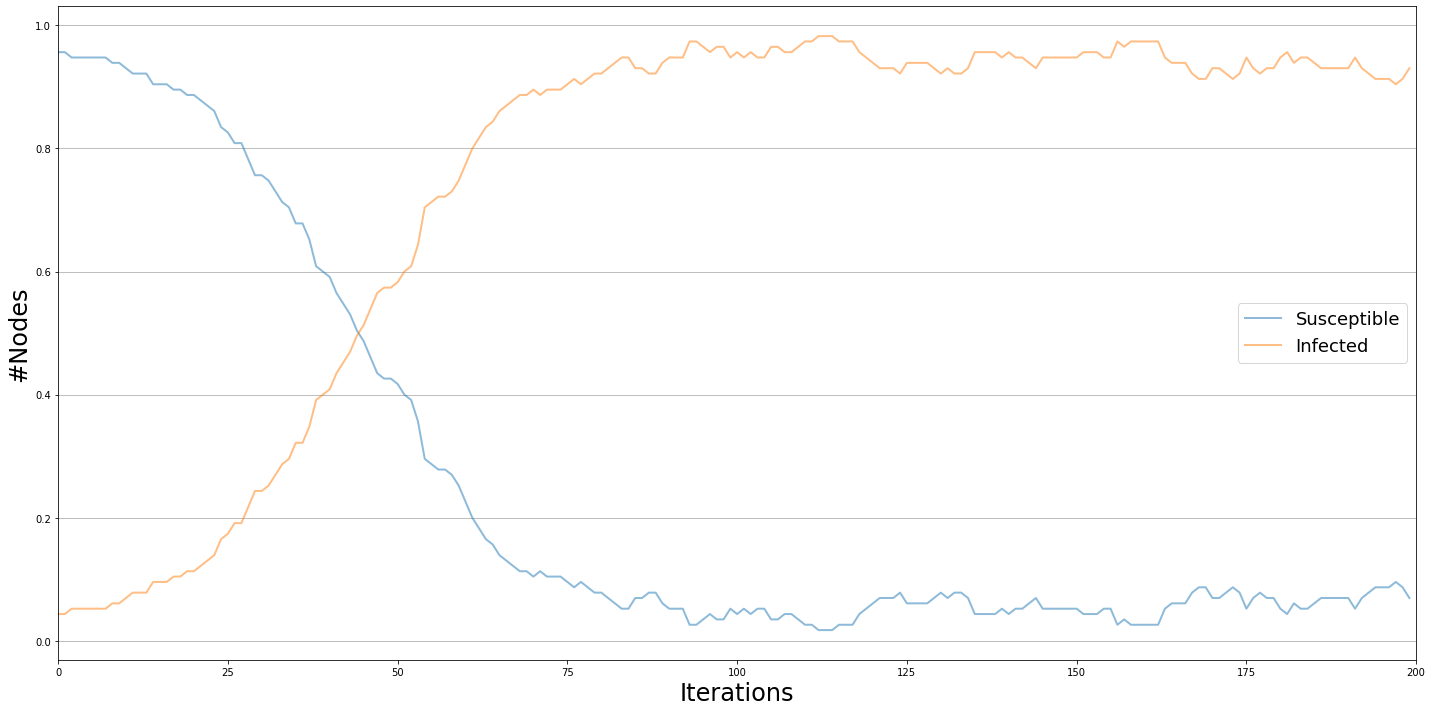

In [ ]:
SISplot(g3)